# 2.3.1. Загрузка данных и первичный осмотр

## 1. Импорт библиотек

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Настройка отображения графиков

In [10]:
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## 2. Загрузка датасета. Используем встроенный датасет Seaborn для примера

In [11]:
titanic = sns.load_dataset('titanic')
df = titanic.copy()

## 3. Первичный осмотр

In [12]:
print("Первые 5 строк датасета:")
display(df.head())

print("\nИнформация о датасете:")
print(df.info())

print("\nОписательные статистики:")
display(df.describe())

print("\nОписательные статистики для категориальных переменных:")
display(df.describe(include=['object', 'category']))

Первые 5 строк датасета:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Описательные статистики:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Описательные статистики для категориальных переменных:


,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


# 2.3.2. Пропуски, дубликаты и базовый контроль качества

## 1. Доля пропусков в каждом столбце

In [29]:
print("Доля пропущенных значений в каждом столбце:")
missing_percent = (df.isna().mean() * 100).round(2)
display(missing_percent[missing_percent > 0])

Доля пропущенных значений в каждом столбце:


age            19.87
embarked        0.22
deck           77.22
embark_town     0.22
dtype: float64

## Визуализация пропусков

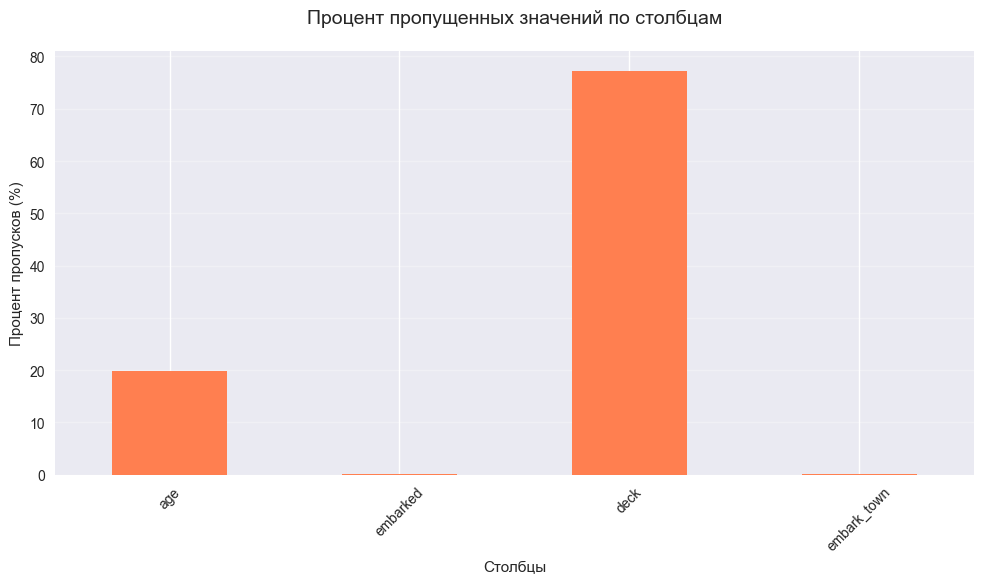

In [30]:
plt.figure(figsize=(10, 6))
missing_percent[missing_percent > 0].plot(kind='bar', color='coral')
plt.title('Процент пропущенных значений по столбцам', fontsize=14, pad=20)
plt.xlabel('Столбцы')
plt.ylabel('Процент пропусков (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 2. Проверка на дубликаты

In [31]:
duplicates = df.duplicated().sum()
print(f"Количество полностью дублирующих строк: {duplicates}")

if duplicates > 0:
    print("Примеры дубликатов:")
    display(df[df.duplicated()].head())
else:
    print("Дубликаты не найдены.")

Количество полностью дублирующих строк: 107
Примеры дубликатов:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3. Поиск "подозрительных" случаев

In [32]:
print("=== Проверка логических противоречий и некорректных значений ===\n")

=== Проверка логических противоречий и некорректных значений ===



## 3.1. Отрицательные или нулевые значения там, где их не должно быть

In [33]:
print("1. Проверка возраста:")
print(f"Минимальный возраст: {df['age'].min()}")
print(f"Максимальный возраст: {df['age'].max()}")
print(f"Количество пассажиров с возрастом <= 0: {(df['age'] <= 0).sum()}")
print(f"Количество пассажиров с возрастом > 100: {(df['age'] > 100).sum()}")

1. Проверка возраста:
Минимальный возраст: 0.42
Максимальный возраст: 80.0
Количество пассажиров с возрастом <= 0: 0
Количество пассажиров с возрастом > 100: 0


## Пассажиры с нулевым или отрицательным возрастом

In [34]:
if (df['age'] <= 0).any():
    print("\nПассажиры с некорректным возрастом:")
    display(df[df['age'] <= 0][['survived', 'pclass', 'sex', 'age', 'fare']])

## 3.2. Нереалистичные значения цены билета

In [35]:
print("\n2. Проверка стоимости билета (fare):")
print(f"Минимальная стоимость: {df['fare'].min()}")
print(f"Максимальная стоимость: {df['fare'].max()}")
print(f"Количество билетов с нулевой стоимостью: {(df['fare'] == 0).sum()}")
print(f"Количество билетов с отрицательной стоимостью: {(df['fare'] < 0).sum()}")

if (df['fare'] <= 0).any():
    print("\nПассажиры с некорректной стоимостью билета:")
    display(df[df['fare'] <= 0][['survived', 'pclass', 'sex', 'age', 'fare']])


2. Проверка стоимости билета (fare):
Минимальная стоимость: 0.0
Максимальная стоимость: 512.3292
Количество билетов с нулевой стоимостью: 15
Количество билетов с отрицательной стоимостью: 0

Пассажиры с некорректной стоимостью билета:


,survived,pclass,sex,age,fare
179,0,3,male,36.0,0.0
263,0,1,male,40.0,0.0
271,1,3,male,25.0,0.0
277,0,2,male,NaN,0.0
302,0,3,male,19.0,0.0
413,0,2,male,NaN,0.0
466,0,2,male,NaN,0.0
481,0,2,male,NaN,0.0
597,0,3,male,49.0,0.0
633,0,1,male,NaN,0.0


## 3.3. Логические противоречия: дети в 3-м классе с дорогими билетами

In [36]:
print("\n3. Логические проверки:")


3. Логические проверки:


## Дети (возраст < 18) без родителей на борту

In [37]:
children_alone = df[(df['age'] < 18) & (df['parch'] == 0) & (df['sibsp'] == 0)]
print(f"Количество детей без родственников на борту: {len(children_alone)}")

Количество детей без родственников на борту: 23


## Пассажиры 1-го класса с очень низкой стоимостью билета

In [38]:
suspicious_fare = df[(df['pclass'] == 1) & (df['fare'] < 10)]
print(f"Количество пассажиров 1-го класса с билетом дешевле $10: {len(suspicious_fare)}")

if len(suspicious_fare) > 0:
    print("\nПассажиры 1-го класса с подозрительно дешевыми билетами:")
    display(suspicious_fare[['survived', 'sex', 'age', 'fare', 'embarked']])

Количество пассажиров 1-го класса с билетом дешевле $10: 6

Пассажиры 1-го класса с подозрительно дешевыми билетами:


,survived,sex,age,fare,embarked
263,0,male,40.0,0.0,S
633,0,male,NaN,0.0,S
806,0,male,39.0,0.0,S
815,0,male,NaN,0.0,S
822,0,male,38.0,0.0,S
872,0,male,33.0,5.0,S


## 3.4. Проверка пола

In [39]:
print("\n4. Уникальные значения в столбце 'sex':")
print(df['sex'].unique())


4. Уникальные значения в столбце 'sex':
['male' 'female']


## 3.5. Проверка портов посадки

In [40]:
print("\n5. Уникальные значения в столбце 'embarked':")
print(df['embarked'].unique())


5. Уникальные значения в столбце 'embarked':
['S' 'C' 'Q' nan]


# 2.3.3. Базовый EDA: группировки, агрегаты и частоты

## 1. Частоты для категориальных переменных

=== Частоты категориальных переменных ===

1. Распределение по классам кают:


pclass
3    491
1    216
2    184
Name: count, dtype: int64


2. Распределение по полу:


sex
male      64.76
female    35.24
Name: proportion, dtype: float64


3. Распределение по порту посадки:


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

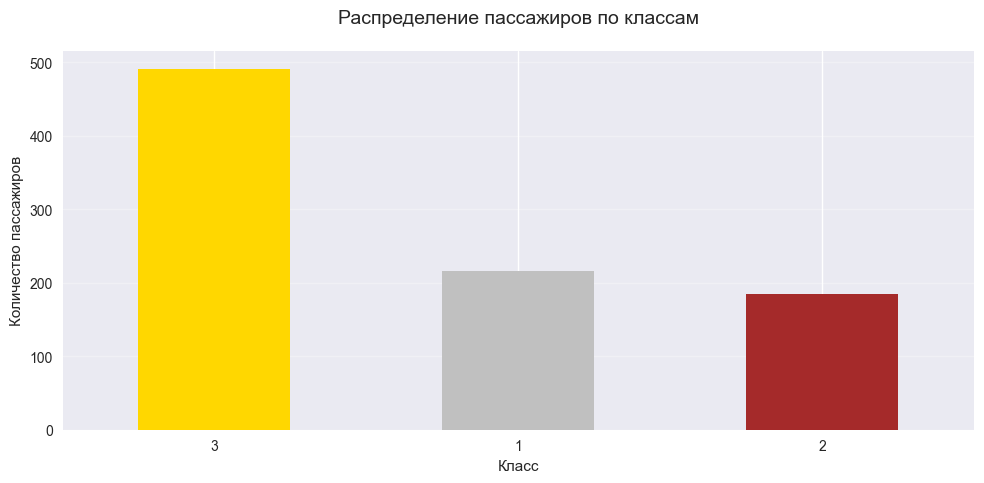

In [41]:
print("=== Частоты категориальных переменных ===\n")

print("1. Распределение по классам кают:")
class_counts = df['pclass'].value_counts()
display(class_counts)

print("\n2. Распределение по полу:")
sex_counts = df['sex'].value_counts(normalize=True) * 100
display(sex_counts.round(2))

print("\n3. Распределение по порту посадки:")
embarked_counts = df['embark_town'].value_counts()
display(embarked_counts)

# Визуализация распределения по классам
plt.figure(figsize=(10, 5))
class_counts.plot(kind='bar', color=['gold', 'silver', 'brown'])
plt.title('Распределение пассажиров по классам', fontsize=14, pad=20)
plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 2. Группировки с агрегатами

In [42]:
print("=== Группировки и агрегаты ===\n")

=== Группировки и агрегаты ===



## 2.1. Средняя выживаемость и стоимость билета по классам

In [43]:
print("1. Средняя выживаемость и стоимость билета по классам:")
group_class = df.groupby('pclass').agg({
    'survived': ['mean', 'sum', 'count'],
    'fare': ['mean', 'median', 'std'],
    'age': ['mean', 'median']
}).round(2)

display(group_class)

1. Средняя выживаемость и стоимость билета по классам:


survived              fare                  age       
           mean  sum count   mean median    std   mean median
pclass                                                       
1          0.63  136   216  84.15  60.29  78.38  38.23   37.0
2          0.47   87   184  20.66  14.25  13.42  29.88   29.0
3          0.24  119   491  13.68   8.05  11.78  25.14   24.0

## 2.2. Статистики по полу и классу

In [44]:
print("\n2. Статистики выживаемости по полу и классу:")
group_sex_class = df.groupby(['sex', 'pclass']).agg({
    'survived': ['mean', 'sum', 'count'],
    'age': ['mean', 'median']
}).round(2)

display(group_sex_class)


2. Статистики выживаемости по полу и классу:


survived              age       
                  mean sum count   mean median
sex    pclass                                 
female 1          0.97  91    94  34.61   35.0
       2          0.92  70    76  28.72   28.0
       3          0.50  72   144  21.75   21.5
male   1          0.37  45   122  41.28   40.0
       2          0.16  17   108  30.74   30.0
       3          0.14  47   347  26.51   25.0

## 3. Создание дополнительных группировок (bins)

In [45]:
print("=== Создание возрастных групп ===\n")

=== Создание возрастных групп ===



## Создаем возрастные группы

In [46]:
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 12, 18, 30, 50, 100], 
                         labels=['Дети (0-12)', 'Подростки (13-18)', 
                                 'Молодые (19-30)', 'Взрослые (31-50)', 
                                 'Пожилые (51+)'])

## Проверяем распределение по возрастным группам

In [47]:
print("Распределение по возрастным группам:")
age_group_counts = df['age_group'].value_counts().sort_index()
display(age_group_counts)

Распределение по возрастным группам:


age_group
Дети (0-12)           69
Подростки (13-18)     70
Молодые (19-30)      270
Взрослые (31-50)     241
Пожилые (51+)         64
Name: count, dtype: int64

## Выживаемость по возрастным группам

In [48]:
print("\nВыживаемость по возрастным группам:")
age_survival = df.groupby('age_group')['survived'].mean().round(3)
display(age_survival)


Выживаемость по возрастным группам:


C:\Users\Danil\AppData\Local\Temp\ipykernel_9256\130627418.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('age_group')['survived'].mean().round(3)


age_group
Дети (0-12)          0.580
Подростки (13-18)    0.429
Молодые (19-30)      0.356
Взрослые (31-50)     0.423
Пожилые (51+)        0.344
Name: survived, dtype: float64

## 4. Группировка по возрастным группам и классу

In [49]:
print("Выживаемость по возрастным группам и классам:")
age_class_survival = df.groupby(['age_group', 'pclass'])['survived'].mean().unstack().round(3)
display(age_class_survival)

Выживаемость по возрастным группам и классам:


C:\Users\Danil\AppData\Local\Temp\ipykernel_9256\1488370246.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class_survival = df.groupby(['age_group', 'pclass'])['survived'].mean().unstack().round(3)


pclass,1,2,3
age_group,,,
Дети (0-12),0.750,1.000,0.417
Подростки (13-18),0.917,0.500,0.283
Молодые (19-30),0.711,0.418,0.228
Взрослые (31-50),0.674,0.468,0.161
Пожилые (51+),0.462,0.200,0.100


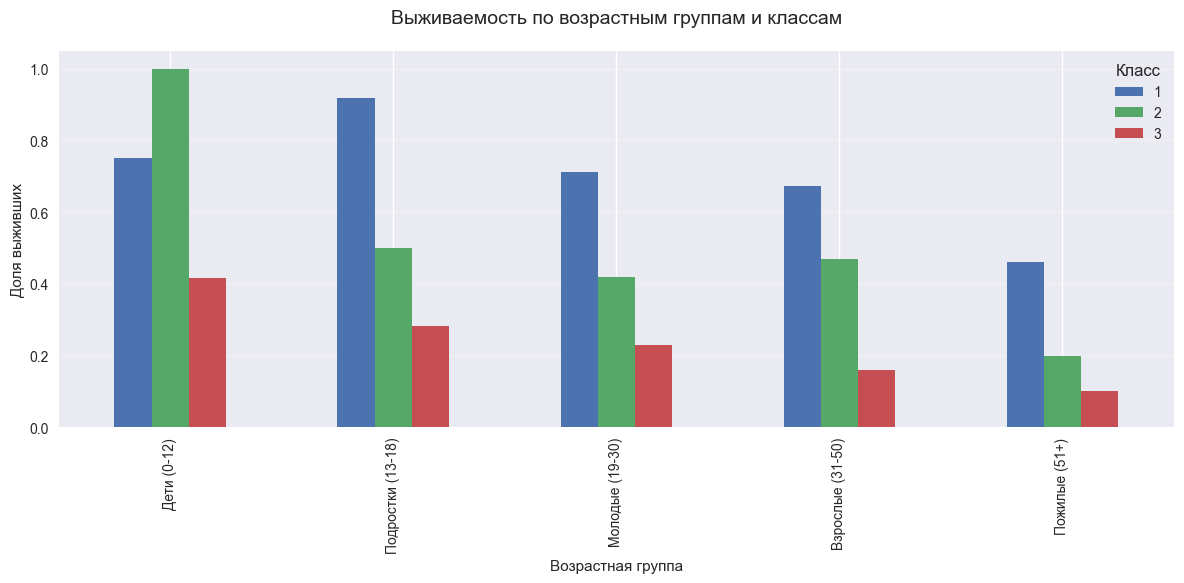

In [50]:
age_class_survival.plot(kind='bar', figsize=(12, 6))
plt.title('Выживаемость по возрастным группам и классам', fontsize=14, pad=20)
plt.xlabel('Возрастная группа')
plt.ylabel('Доля выживших')
plt.legend(title='Класс')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2.4. Визуализация данных в Matplotlib

## 1. ГИСТОГРАММА - распределение возраста

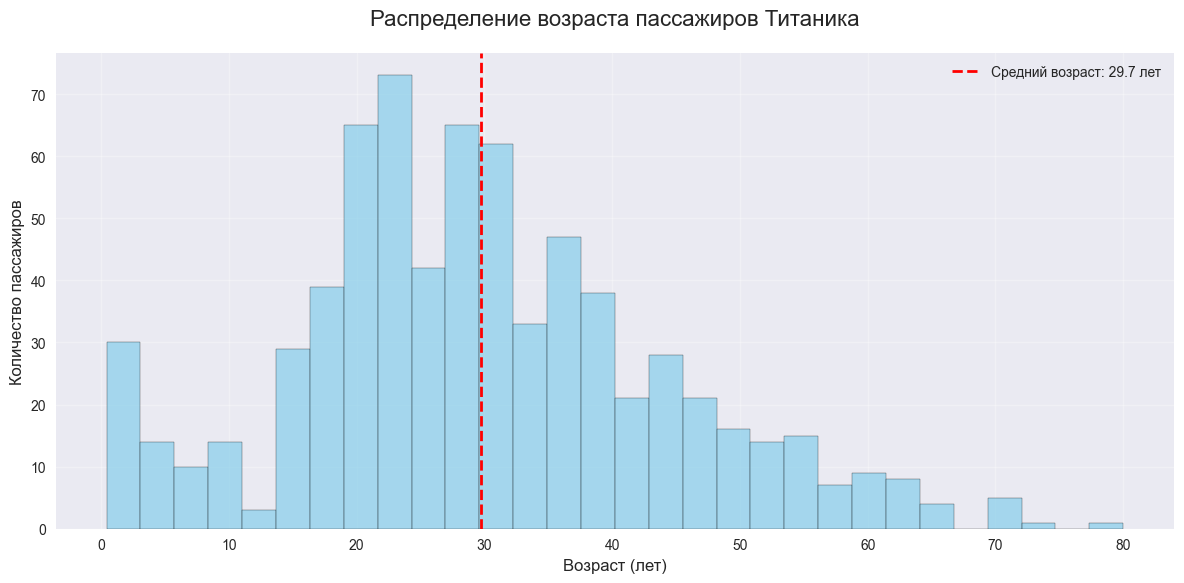

Гистограмма сохранена в файл: homeworks/HW02/figures\age_distribution.png


In [55]:
import os

figures_path = 'homeworks/HW02/figures'
os.makedirs(figures_path, exist_ok=True)

plt.figure(figsize=(12, 6))
plt.hist(df['age'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Распределение возраста пассажиров Титаника', fontsize=16, pad=20)
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.grid(alpha=0.3)
plt.axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Средний возраст: {df["age"].mean():.1f} лет')
plt.legend()
plt.tight_layout()

plt.savefig(os.path.join(figures_path, 'age_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()
print(f"Гистограмма сохранена в файл: {os.path.join(figures_path, 'age_distribution.png')}")

## 2. БОКСПЛОТ - стоимость билета по классам

C:\Users\Danil\AppData\Local\Temp\ipykernel_9256\1119525425.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=labels, patch_artist=True, showfliers=False)


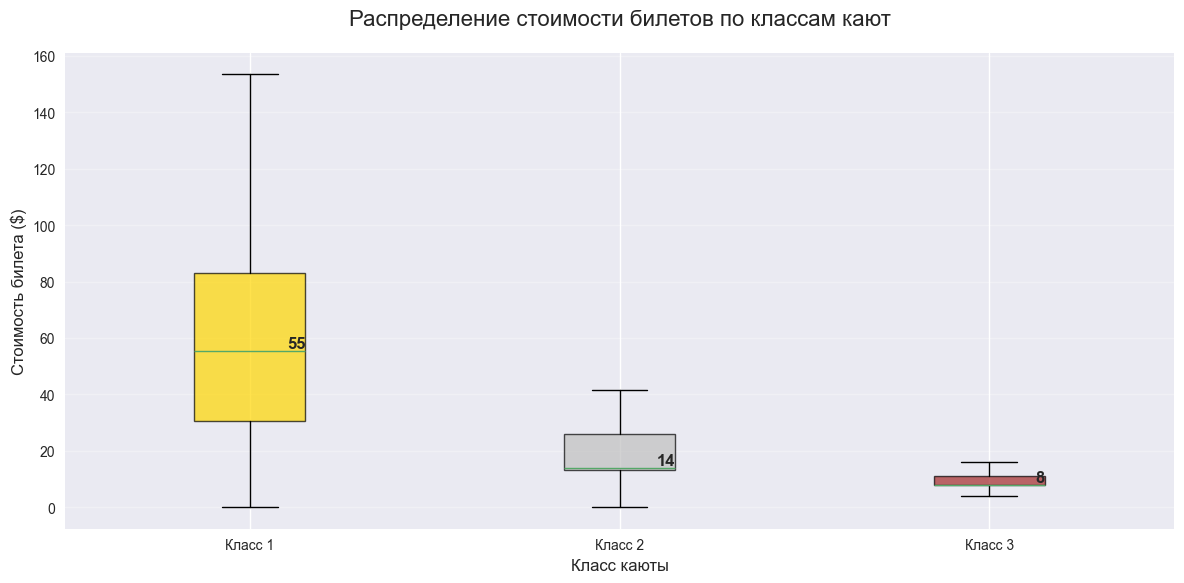

Боксплот сохранен в файл: homeworks/HW02/figures\fare_by_class_boxplot.png


In [60]:
figures_path = 'homeworks/HW02/figures'
os.makedirs(figures_path, exist_ok=True)

plt.figure(figsize=(12, 6))
data_to_plot = []
labels = []
for pclass in sorted(df['pclass'].unique()):
    fare_data = df[df['pclass'] == pclass]['fare'].dropna()
    # Ограничиваем выбросы для лучшей визуализации
    q1, q3 = fare_data.quantile([0.25, 0.75])
    iqr = q3 - q1
    fare_filtered = fare_data[(fare_data >= q1 - 1.5*iqr) & (fare_data <= q3 + 1.5*iqr)]
    data_to_plot.append(fare_filtered)
    labels.append(f'Класс {pclass}')

# Боксплот
box = plt.boxplot(data_to_plot, labels=labels, patch_artist=True, showfliers=False)

# Настраиваем цвета
colors = ['gold', 'silver', 'brown']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('Распределение стоимости билетов по классам кают', fontsize=16, pad=20)
plt.xlabel('Класс каюты', fontsize=12)
plt.ylabel('Стоимость билета ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Добавляем аннотации с медианой
for i, line in enumerate(box['medians']):
    x, y = line.get_xydata()[1]  # координаты медианы
    median_value = np.median(data_to_plot[i])
    plt.text(x, y, f'{median_value:.0f}', horizontalalignment='right', 
             verticalalignment='bottom', fontweight='bold')

plt.savefig(os.path.join(figures_path, 'fare_by_class_boxplot.png'), dpi=300, bbox_inches='tight')
plt.show()
print(f"Боксплот сохранен в файл: {os.path.join(figures_path, 'fare_by_class_boxplot.png')}")

## 3. SCATTER PLOT - связь между возрастом, стоимостью билета и выживаемостью

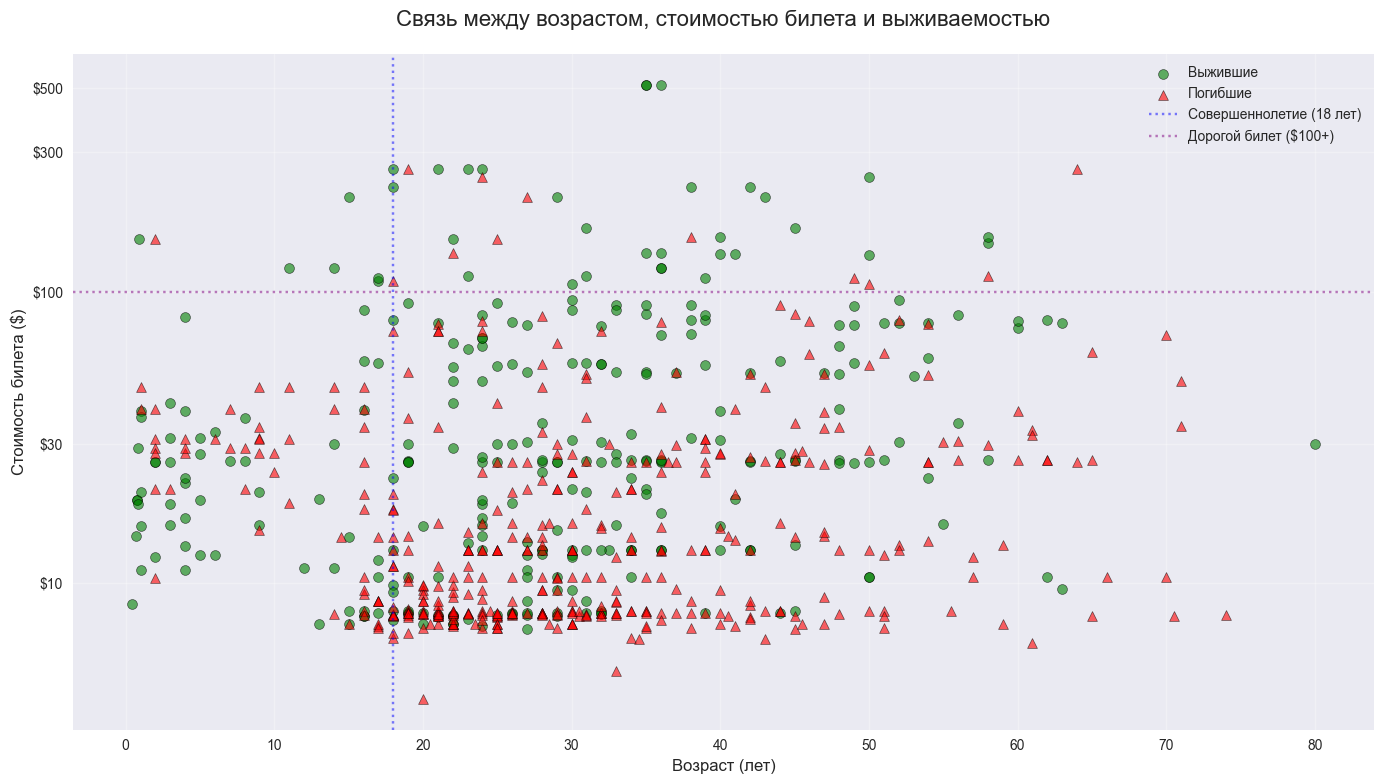

Диаграмма рассеяния сохранена в файл: homeworks/HW02/figures/age_fare_survival_scatter.png


In [62]:
figures_path = 'homeworks/HW02/figures'
os.makedirs(figures_path, exist_ok=True)

plt.figure(figsize=(14, 8))

# Разделяем данные на выживших и погибших
survived = df[df['survived'] == 1]
not_survived = df[df['survived'] == 0]

# Scatter plot для выживших
plt.scatter(survived['age'], survived['fare'], 
           alpha=0.6, s=50, c='green', label='Выжившие', edgecolors='black', linewidth=0.5)

# Scatter plot для погибших
plt.scatter(not_survived['age'], not_survived['fare'], 
           alpha=0.6, s=50, c='red', label='Погибшие', edgecolors='black', linewidth=0.5, marker='^')

plt.title('Связь между возрастом, стоимостью билета и выживаемостью', fontsize=16, pad=20)
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Стоимость билета ($)', fontsize=12)
plt.legend(title='Статус', fontsize=11, title_fontsize=12)
plt.grid(alpha=0.3)

# Добавляем дополнительную информацию
plt.axvline(18, color='blue', linestyle=':', alpha=0.5, label='Совершеннолетие (18 лет)')
plt.axhline(100, color='purple', linestyle=':', alpha=0.5, label='Дорогой билет ($100+)')

# Логарифмическая шкала для оси Y (т.к. есть очень дорогие билеты)
plt.yscale('log')
plt.yticks([10, 30, 100, 300, 500], ['$10', '$30', '$100', '$300', '$500'])

plt.legend()
plt.tight_layout()
plt.savefig('homeworks/HW02/figures/age_fare_survival_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("Диаграмма рассеяния сохранена в файл: homeworks/HW02/figures/age_fare_survival_scatter.png")

## Дополнительная визуализация: выживаемость по полу и классу

<Figure size 1200x600 with 0 Axes>

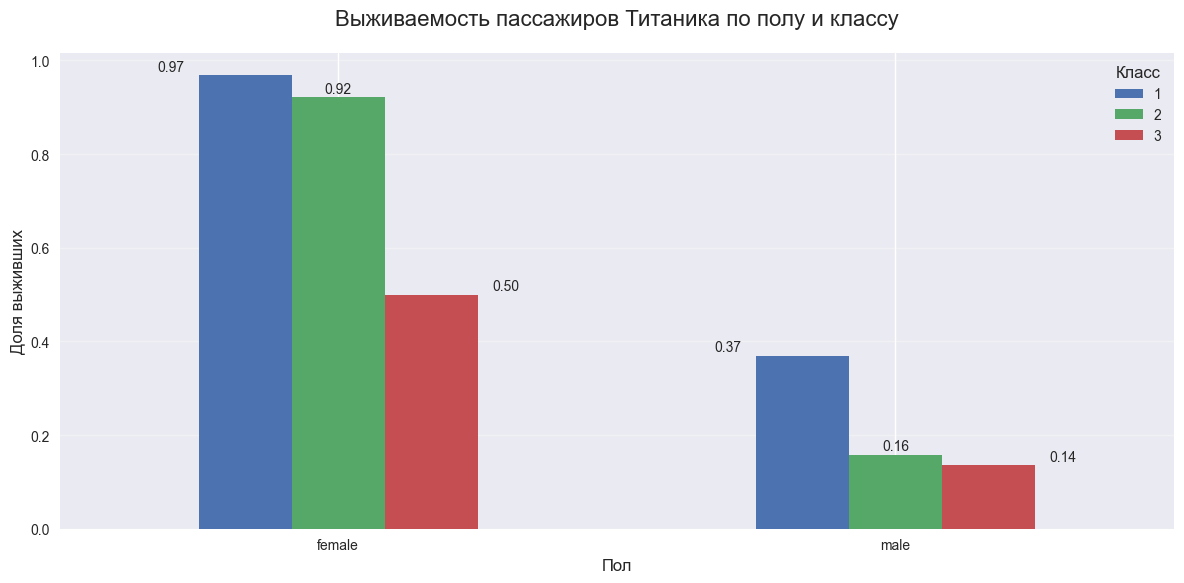

=== РЕЗЮМЕ ===
Все задачи выполнены:
1. Данные загружены и проведен первичный осмотр
2. Проанализированы пропуски, дубликаты и качество данных
3. Выполнены группировки и агрегации
4. Построены 3 обязательных графика + дополнительный
5. Графики сохранены в папку figures/

Сохраненные графики:
1. age_distribution.png - гистограмма распределения возраста
2. fare_by_class_boxplot.png - боксплот стоимости билетов по классам
3. age_fare_survival_scatter.png - диаграмма рассеяния
4. survival_by_sex_class.png - дополнительная визуализация


In [63]:
figures_path = 'homeworks/HW02/figures'
os.makedirs(figures_path, exist_ok=True)

plt.figure(figsize=(12, 6))

# Создаем сводную таблицу
survival_rate = df.groupby(['sex', 'pclass'])['survived'].mean().unstack()

# Столбчатая диаграмма
survival_rate.plot(kind='bar', figsize=(12, 6))
plt.title('Выживаемость пассажиров Титаника по полу и классу', fontsize=16, pad=20)
plt.xlabel('Пол', fontsize=12)
plt.ylabel('Доля выживших', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Класс')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Добавляем значения на столбцы
for i, (sex, row) in enumerate(survival_rate.iterrows()):
    for j, value in enumerate(row):
        plt.text(i - 0.3 + j*0.3, value + 0.01, f'{value:.2f}', 
                ha='center', fontsize=10)

plt.savefig('homeworks/HW02/figures/survival_by_sex_class.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
print("=== РЕЗЮМЕ ===")
print("Все задачи выполнены:")
print("1. Данные загружены и проведен первичный осмотр")
print("2. Проанализированы пропуски, дубликаты и качество данных")
print("3. Выполнены группировки и агрегации")
print("4. Построены 3 обязательных графика + дополнительный")
print("5. Графики сохранены в папку figures/")

print("\nСохраненные графики:")
print("1. age_distribution.png - гистограмма распределения возраста")
print("2. fare_by_class_boxplot.png - боксплот стоимости билетов по классам")
print("3. age_fare_survival_scatter.png - диаграмма рассеяния")
print("4. survival_by_sex_class.png - дополнительная визуализация")